<a href="https://colab.research.google.com/github/vinkrishna/ExpandingSenses/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Signal and Signal Analysis: Amplitude, Frequency, Phase, and Time-Domain Analytical Methods




# Amplitude
Amplitude is the maximum value of a signal's waveform from the mean or zero value. The amplitude can be expressed as the peak value, peak-to-peak value, or root mean square (RMS) value. The amplitude can provide useful information about the signal's strength or energy.

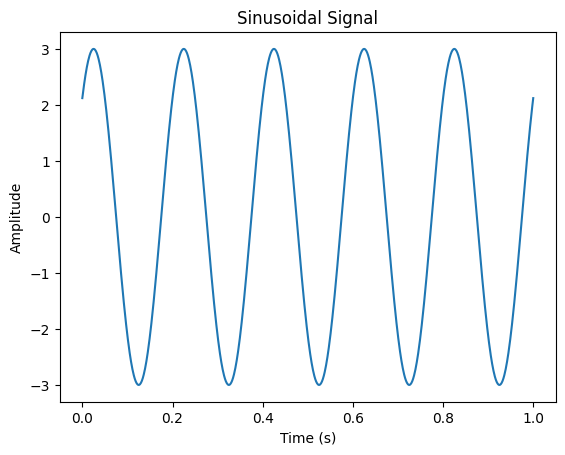

Peak Amplitude: 2.9978777525277454
Peak-to-Peak Amplitude: 5.999990728716487
RMS Amplitude: 2.1213203435596424


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sinusoidal signal
t = np.linspace(0, 1, 1000)
f = 5  # frequency in Hz
A = 3  # amplitude
phi = np.pi / 4  # phase

signal = A * np.sin(2 * np.pi * f * t + phi)

# Calculate amplitude
peak_amplitude = np.max(signal) - np.mean(signal)
peak_to_peak_amplitude = np.max(signal) - np.min(signal)
rms_amplitude = np.sqrt(np.mean(np.square(signal)))

# Plot the signal
plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sinusoidal Signal')
plt.show()

print(f"Peak Amplitude: {peak_amplitude}")
print(f"Peak-to-Peak Amplitude: {peak_to_peak_amplitude}")
print(f"RMS Amplitude: {rms_amplitude}")


#Frequency
Frequency is the number of cycles per unit of time, often measured in Hertz (Hz). In signal analysis, the frequency domain representation can help identify the signal's main frequency components or harmonics.

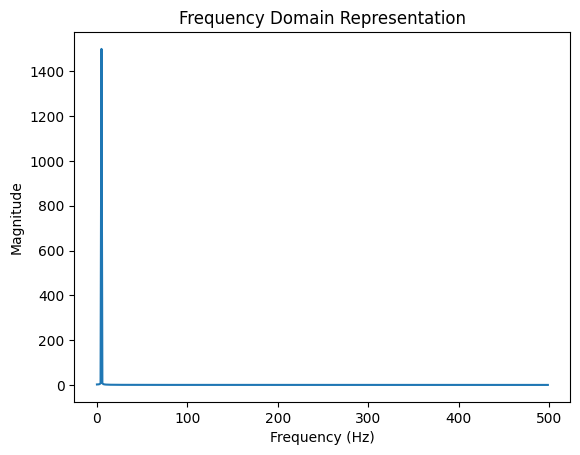

In [2]:
from scipy.fft import fft

# Calculate the Fast Fourier Transform (FFT) of the signal
signal_fft = fft(signal)

# Calculate the frequencies associated with the FFT
freqs = np.fft.fftfreq(len(signal), np.mean(np.diff(t)))

# Plot the frequency domain representation
plt.plot(freqs[:len(freqs)//2], np.abs(signal_fft[:len(signal_fft)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation')
plt.show()


#Phase
Phase is the relative position of a waveform in time, typically expressed in degrees or radians. The phase difference between two signals can provide insights into their synchronization or time delay.

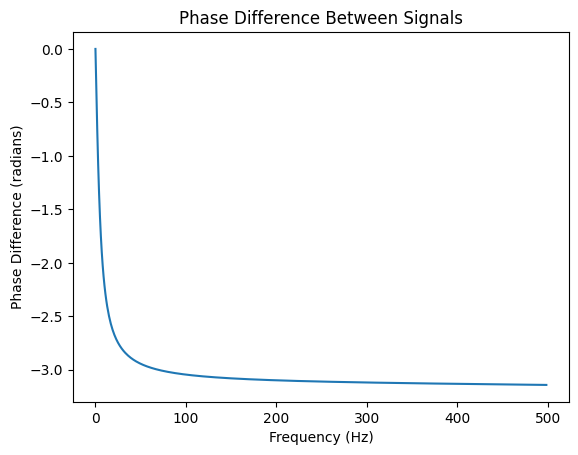

In [3]:
# Generate a second sinusoidal signal with a different phase
phi2 = 3 * np.pi / 4
signal2 = A * np.sin(2 * np.pi * f * t + phi2)

# Calculate the cross-spectrum between the two signals
cross_spectrum = np.fft.fft(signal) * np.conj(np.fft.fft(signal2))

# Calculate the phase difference between the signals
phase_diff = np.angle(cross_spectrum)

# Plot the phase difference
plt.plot(freqs[:len(freqs)//2], phase_diff[:len(phase_diff)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Difference (radians)')
plt.title('Phase Difference Between Signals')
plt.show()



#Time-Domain Analytical Methods
Time-domain methods analyze the signal in its original form, focusing on amplitude and time characteristics. Common techniques include signal averaging, time-domain filters, autocorrelation, and cross-correlation.


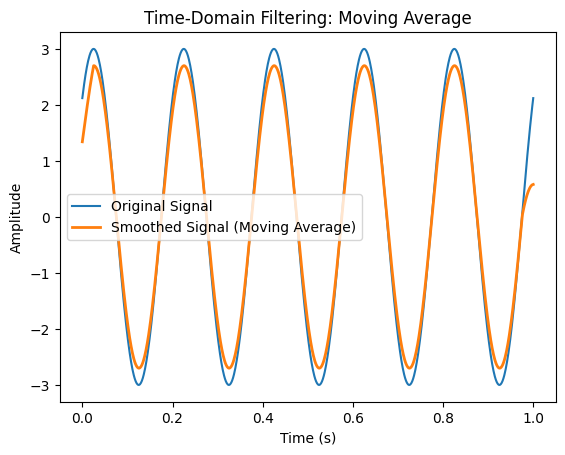

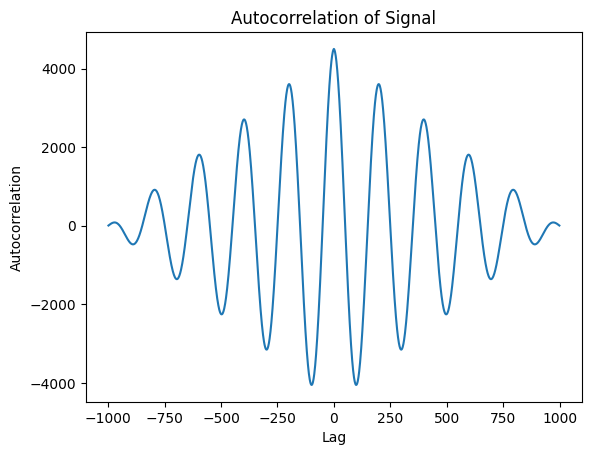

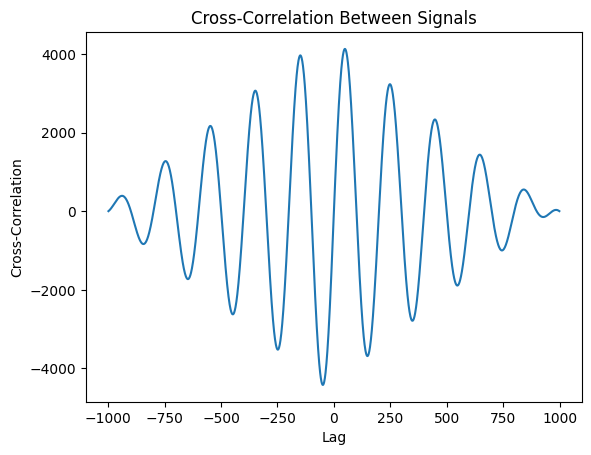

In [4]:
# Example: Moving Average Filter
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

window_size = 50
smoothed_signal = moving_average(signal, window_size)

# Plot original and smoothed signals
plt.plot(t, signal, label='Original Signal')
plt.plot(t, smoothed_signal, label='Smoothed Signal (Moving Average)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Moving Average')
plt.show()

# Example: Autocorrelation
def autocorrelation(signal):
    return np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')

autocorr_signal = autocorrelation(signal)
autocorr_lags = np.arange(-len(signal) + 1, len(signal))

# Plot autocorrelation
plt.plot(autocorr_lags, autocorr_signal)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Signal')
plt.show()

# Example: Cross-Correlation
def crosscorrelation(signal1, signal2):
    return np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')

crosscorr_signal = crosscorrelation(signal, signal2)
crosscorr_lags = np.arange(-len(signal) + 1, len(signal))

# Plot cross-correlation
plt.plot(crosscorr_lags, crosscorr_signal)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Between Signals')
plt.show()


# Amplitude, phase, frequency and time on EEG Data
In this example, we simulate an 8-channel EEG dataset and demonstrate amplitude, phase, frequency, and time-domain analysis methods using the generated data. These examples can be used as a starting point for more complex analysis of multi-channel EEG data.

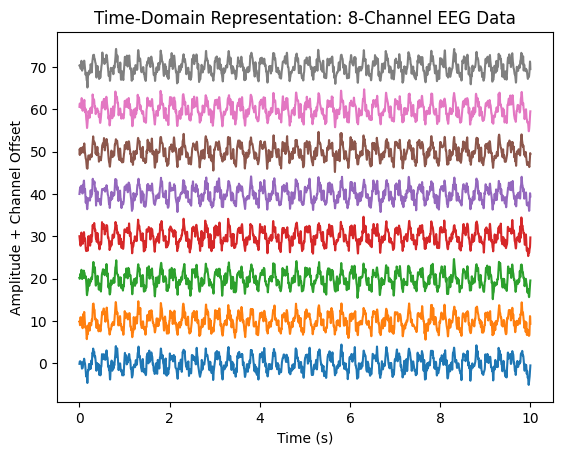

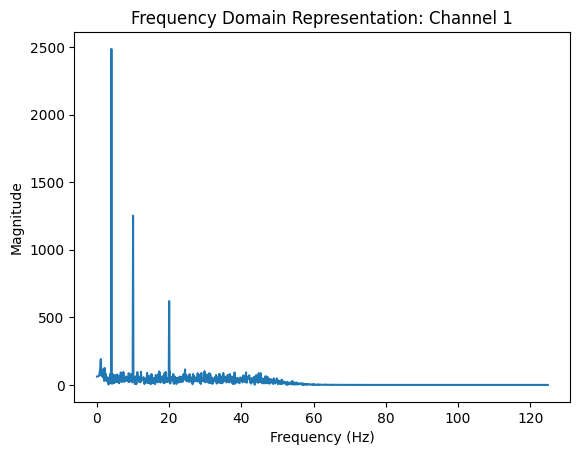

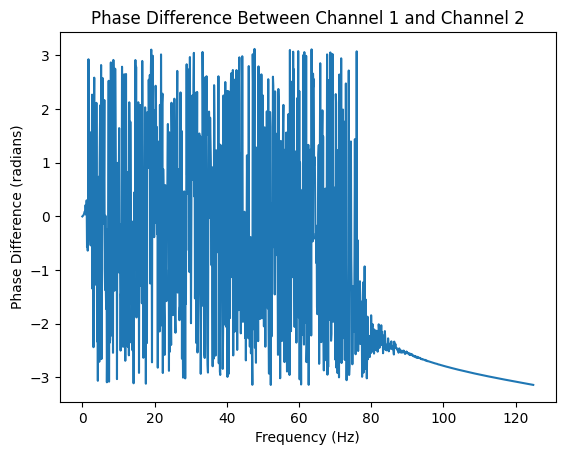

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Function to create a Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Generate synthetic 8-channel EEG data
np.random.seed(42)
fs = 250  # sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # time vector
num_channels = 8

# Generate random EEG-like signals
eeg_data = np.random.normal(0, 1, (num_channels, len(t)))

# Add sinusoidal components to the EEG data to simulate brain rhythms
freqs = [4, 10, 20]  # frequencies in Hz
amplitudes = [2, 1, 0.5]  # amplitudes
phases = [0, np.pi / 4, np.pi / 2]  # phases

for channel in range(num_channels):
    for f, A, phi in zip(freqs, amplitudes, phases):
        eeg_data[channel] += A * np.sin(2 * np.pi * f * t + phi)

# Band-pass filter the EEG data to keep frequency components within the range of 1-50 Hz
lowcut, highcut = 1, 50
eeg_data_filtered = np.zeros_like(eeg_data)

for channel in range(num_channels):
    eeg_data_filtered[channel] = butter_bandpass_filter(eeg_data[channel], lowcut, highcut, fs)

# Calculate the FFT of the filtered EEG data
eeg_fft = np.fft.fft(eeg_data_filtered, axis=1)
freqs_fft = np.fft.fftfreq(len(t), 1 / fs)

# Calculate the phase difference between channel 1 and channel 2
cross_spectrum = eeg_fft[0] * np.conj(eeg_fft[1])
phase_diff = np.angle(cross_spectrum)

# Plot the time-domain representation of the 8-channel EEG data
plt.figure()
for channel in range(num_channels):
    plt.plot(t, eeg_data_filtered[channel] + 10 * channel)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude + Channel Offset')
plt.title('Time-Domain Representation: 8-Channel EEG Data')
plt.show()

# Plot the frequency-domain representation of channel 1
plt.figure()
plt.plot(freqs_fft[:len(freqs_fft)//2], np.abs(eeg_fft[0][:len(eeg_fft[0])//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation: Channel 1')
plt.show()

# Plot the phase difference between channel 1 and channel 2
plt.figure()
plt.plot(freqs_fft[:len(freqs_fft)//2], phase_diff[:len(phase_diff)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Difference (radians)')
plt.title('Phase Difference Between Channel 1 and Channel 2')
plt.show()


#

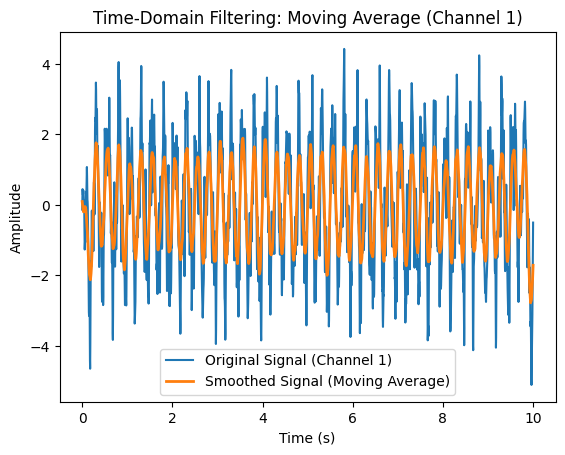

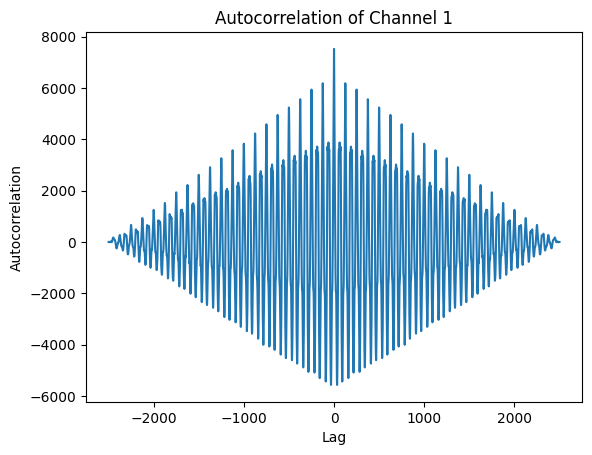

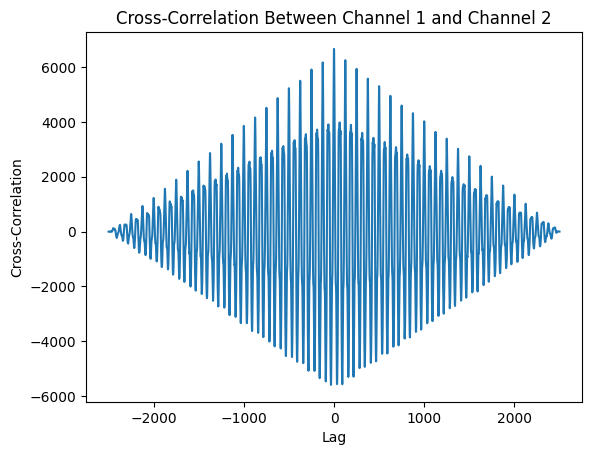

In [12]:
#Time-domain analysis: Moving average filter
def moving_average(signal, window_size):
  return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

window_size = 25
smoothed_eeg_data = np.zeros_like(eeg_data_filtered)

for channel in range(num_channels):
  smoothed_eeg_data[channel] = moving_average(eeg_data_filtered[channel], window_size)

#Plot original and smoothed signals of channel 1
plt.figure()
plt.plot(t, eeg_data_filtered[0], label='Original Signal (Channel 1)')
plt.plot(t, smoothed_eeg_data[0], label='Smoothed Signal (Moving Average)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Moving Average (Channel 1)')
plt.show()

#Autocorrelation of channel 1
def autocorrelation(signal):
  return np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')

autocorr_eeg_signal = autocorrelation(eeg_data_filtered[0])
autocorr_lags = np.arange(-len(t) + 1, len(t))

#Plot autocorrelation
plt.figure()
plt.plot(autocorr_lags, autocorr_eeg_signal)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Channel 1')
plt.show()

#Cross-correlation between channel 1 and channel 2
def crosscorrelation(signal1, signal2):
  return np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')

crosscorr_eeg_signal = crosscorrelation(eeg_data_filtered[0], eeg_data_filtered[1])
crosscorr_lags = np.arange(-len(t) + 1, len(t))

#Plot cross-correlation
plt.figure()
plt.plot(crosscorr_lags, crosscorr_eeg_signal)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Between Channel 1 and Channel 2')
plt.show()

#Time-Domain Analysis
In time-domain analysis, we study signals in their original form, focusing on the amplitude and time characteristics. Some common time-domain techniques include:
#Signal averaging
#Time-domain filters (e.g., moving average, Gaussian filters)
#Autocorrelation
#Cross-correlation


#Signal Averaging
Signal averaging is a technique used to reduce random noise in a signal by averaging multiple instances of the signal or segments of the signal. This is especially useful when the signal of interest is repetitive and the noise is uncorrelated.

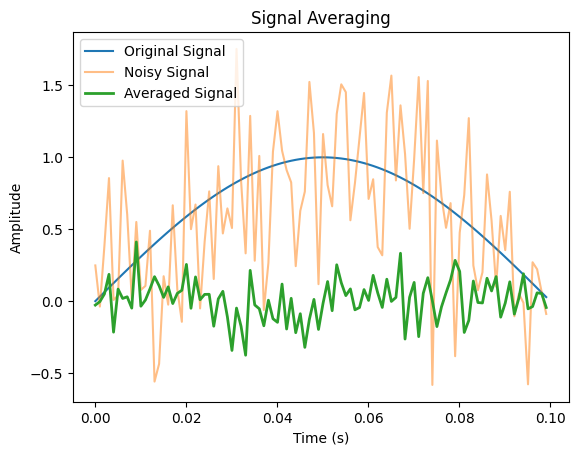

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic noisy signal
np.random.seed(42)
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t)
noisy_signal = signal + np.random.normal(0, 0.5, len(t))

# Segment and average the signal
num_segments = 10
segment_length = len(t) // num_segments
averaged_signal = np.mean(noisy_signal.reshape(num_segments, segment_length), axis=0)

# Plot original, noisy, and averaged signals
plt.plot(t[:segment_length], signal[:segment_length], label='Original Signal')
plt.plot(t[:segment_length], noisy_signal[:segment_length], label='Noisy Signal', alpha=0.5)
plt.plot(t[:segment_length], averaged_signal, label='Averaged Signal', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Signal Averaging')
plt.show()


#Time-Domain Filters: Moving Average and Gaussian Filters
Time-domain filters are used to smooth or remove specific frequency components from a signal. Two common filters are the moving average filter and the Gaussian filter.

#Moving Average Filter

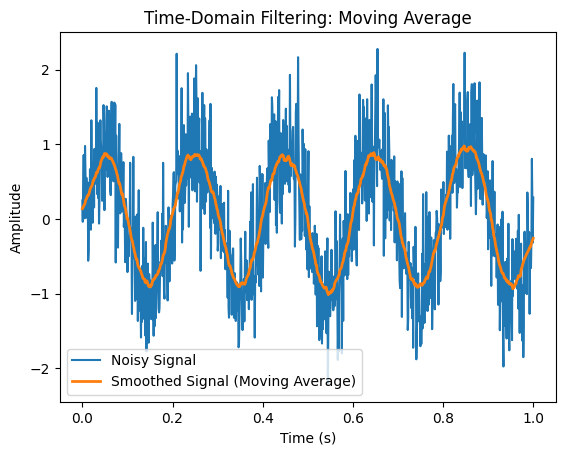

In [14]:
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

window_size = 50
smoothed_signal = moving_average(noisy_signal, window_size)

plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, smoothed_signal, label='Smoothed Signal (Moving Average)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Moving Average')
plt.show()


#Gaussian Filter

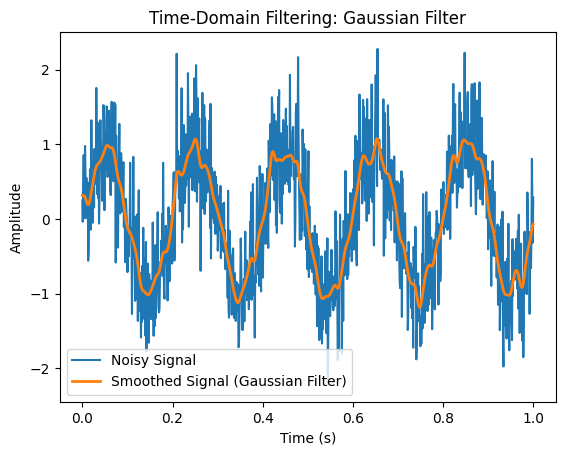

In [15]:
from scipy.ndimage import gaussian_filter

sigma = 5
smoothed_signal_gaussian = gaussian_filter(noisy_signal, sigma)

plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, smoothed_signal_gaussian, label='Smoothed Signal (Gaussian Filter)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Gaussian Filter')
plt.show()


#Autocorrelation
Autocorrelation is a technique used to determine the similarity of a signal with a time-shifted version of itself. It can be helpful in finding repeating patterns or periodicity in a signal.



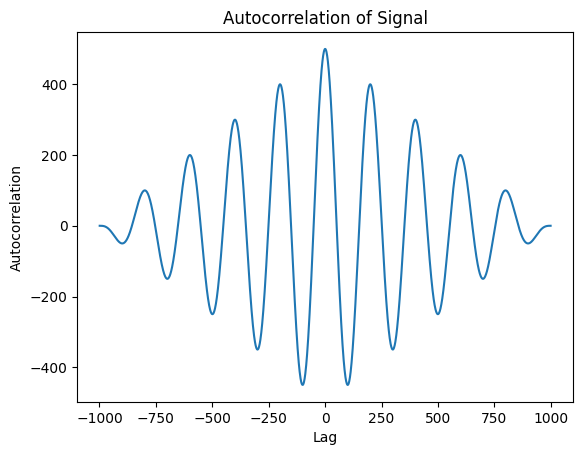

In [17]:
def autocorrelation(signal):
    return np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')

autocorr_signal = autocorrelation(signal)
autocorr_lags = np.arange(-len(t) + 1, len(t))

plt.plot(autocorr_lags, autocorr_signal)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Signal')
plt.show()


#Cross-Correlation

Cross-correlation is a technique used to determine the similarity between two signals by comparing one signal with a time-shifted version of the other signal. It is useful in finding the time lag between two signals, measuring the similarity between them, and identifying features that are common in both signals.


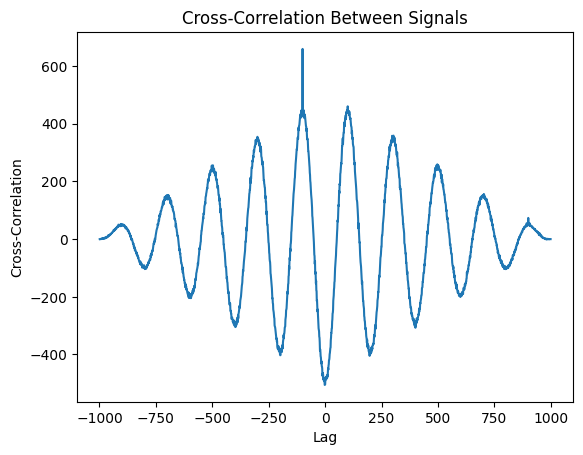

In [18]:
# Generate a second synthetic noisy signal with a time shift
time_shift = 100
shifted_signal = np.roll(noisy_signal, time_shift)

def crosscorrelation(signal1, signal2):
    return np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')

crosscorr_signal = crosscorrelation(noisy_signal, shifted_signal)
crosscorr_lags = np.arange(-len(t) + 1, len(t))

plt.plot(crosscorr_lags, crosscorr_signal)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Between Signals')
plt.show()

# Time-domain analysis techniques on 8-channel EEG data
In this example, we simulate an 8-channel EEG dataset and demonstrated time-domain analysis methods, such as signal averaging, moving average filter, Gaussian filter, autocorrelation, and cross-correlation, using the generated data. 


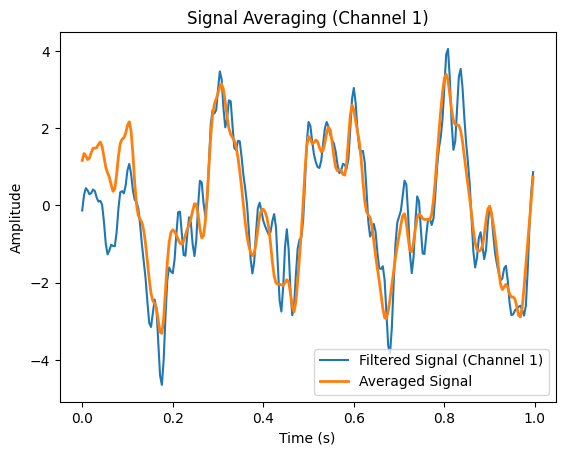

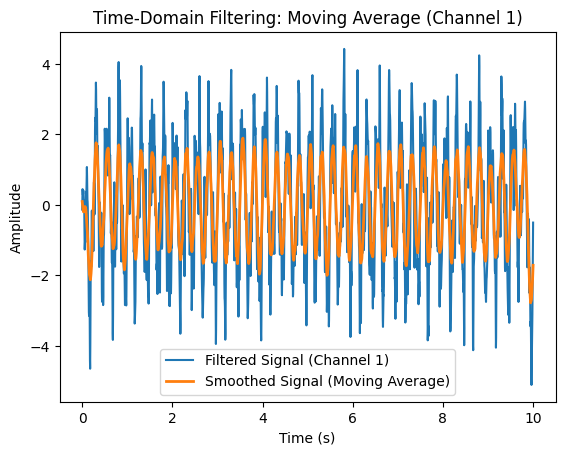

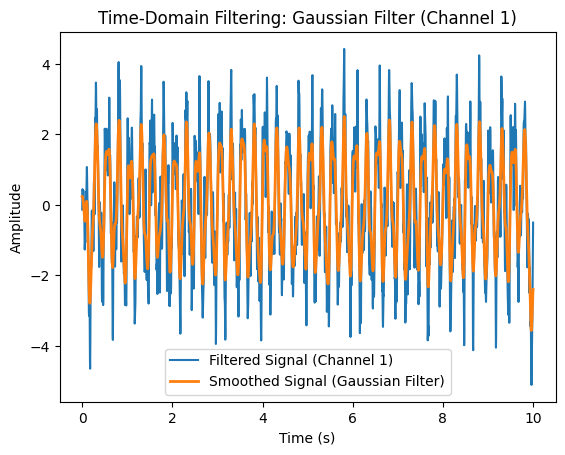

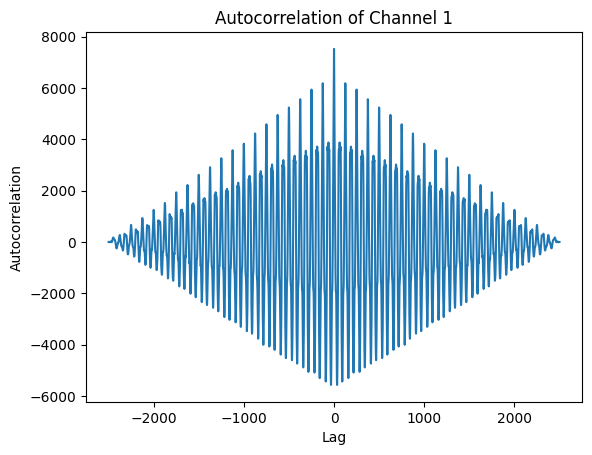

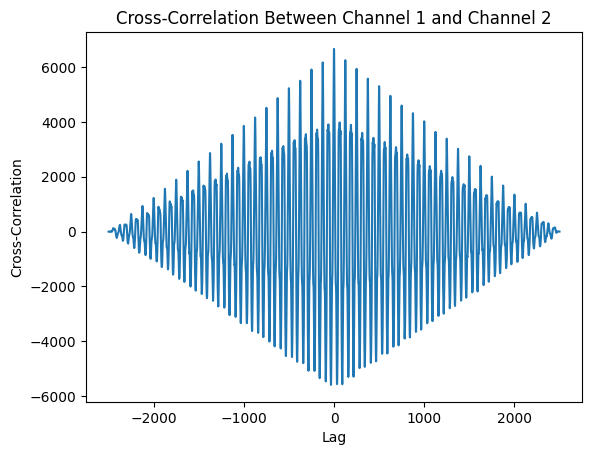

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.ndimage import gaussian_filter

# Function to create a Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Generate synthetic 8-channel EEG data
np.random.seed(42)
fs = 250  # sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # time vector
num_channels = 8

# Generate random EEG-like signals
eeg_data = np.random.normal(0, 1, (num_channels, len(t)))

# Add sinusoidal components to the EEG data to simulate brain rhythms
freqs = [4, 10, 20]  # frequencies in Hz
amplitudes = [2, 1, 0.5]  # amplitudes
phases = [0, np.pi / 4, np.pi / 2]  # phases

for channel in range(num_channels):
    for f, A, phi in zip(freqs, amplitudes, phases):
        eeg_data[channel] += A * np.sin(2 * np.pi * f * t + phi)

# Band-pass filter the EEG data to keep frequency components within the range of 1-50 Hz
lowcut, highcut = 1, 50
eeg_data_filtered = np.zeros_like(eeg_data)

for channel in range(num_channels):
    eeg_data_filtered[channel] = butter_bandpass_filter(eeg_data[channel], lowcut, highcut, fs)

# Time-domain analysis techniques
# Signal averaging
num_segments = 10
segment_length = len(t) // num_segments
averaged_signal = np.mean(eeg_data_filtered[0].reshape(num_segments, segment_length), axis=0)

# Moving average filter
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size) / window_size, mode='same')

window_size = 25
smoothed_signal = moving_average(eeg_data_filtered[0], window_size)

# Gaussian filter
sigma = 5
smoothed_signal_gaussian = gaussian_filter(eeg_data_filtered[0], sigma)

# Autocorrelation
def autocorrelation(signal):
    return np.correlate(signal - np.mean(signal), signal - np.mean(signal), mode='full')

autocorr_signal = autocorrelation(eeg_data_filtered[0])
autocorr_lags = np.arange(-len(t) + 1, len(t))

# Cross-correlation
def crosscorrelation(signal1, signal2):
    return np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')

crosscorr_signal = crosscorrelation(eeg_data_filtered[0], eeg_data_filtered[1])
crosscorr_lags = np.arange(-len(t) + 1, len(t))

plt.figure()
plt.plot(t[:segment_length], eeg_data_filtered[0][:segment_length], label='Filtered Signal (Channel 1)')
plt.plot(t[:segment_length], averaged_signal, label='Averaged Signal', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Signal Averaging (Channel 1)')
plt.show()

plt.figure()
plt.plot(t, eeg_data_filtered[0], label='Filtered Signal (Channel 1)')
plt.plot(t, smoothed_signal, label='Smoothed Signal (Moving Average)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Moving Average (Channel 1)')
plt.show()

plt.figure()
plt.plot(t, eeg_data_filtered[0], label='Filtered Signal (Channel 1)')
plt.plot(t, smoothed_signal_gaussian, label='Smoothed Signal (Gaussian Filter)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Time-Domain Filtering: Gaussian Filter (Channel 1)')
plt.show()

plt.figure()
plt.plot(autocorr_lags, autocorr_signal)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Channel 1')
plt.show()

plt.figure()
plt.plot(crosscorr_lags, crosscorr_signal)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Between Channel 1 and Channel 2')
plt.show()






#Frequency-Domain Analysis

Frequency-domain analysis involves transforming the time-domain signal into its frequency components, allowing us to study the signal's frequency and phase characteristics. This analysis is crucial for understanding the spectral properties of signals and identifying dominant frequency components. In this section, we will discuss some common frequency-domain techniques, including Fourier Transform, Fast Fourier Transform (FFT), Power Spectral Density (PSD), and Spectrogram.

#Fourier Transform
The Fourier Transform is a mathematical technique that transforms a time-domain signal into its frequency components. It provides information about the signal's frequency and phase characteristics, allowing us to identify dominant frequencies and analyze periodic components.

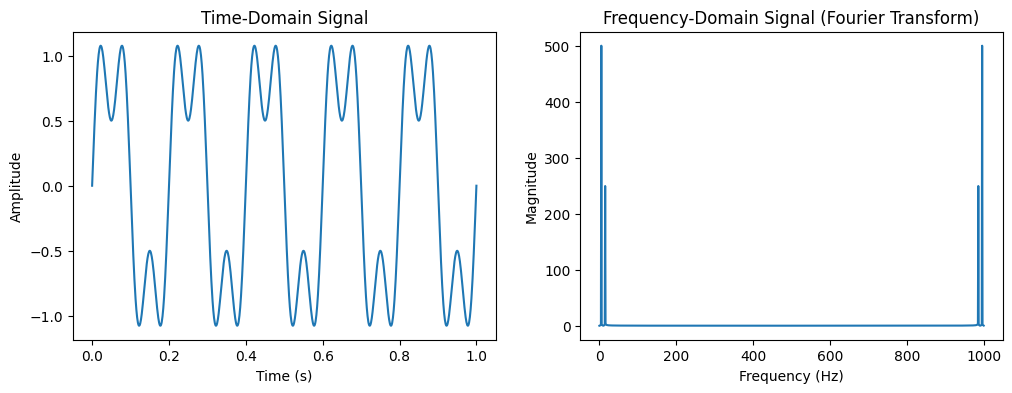

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Discrete Fourier Transform function
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

# Generate a synthetic signal
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 15 * t)

# Compute the Discrete Fourier Transform
X = dft(signal)

# Plot the signal and its frequency components
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(t, signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Time-Domain Signal')

ax2.plot(np.linspace(0, 1000, len(X)), np.abs(X))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency-Domain Signal (Fourier Transform)')
plt.show()


#Fast Fourier Transform (FFT)
The Fast Fourier Transform (FFT) is an efficient algorithm for computing the Discrete Fourier Transform (DFT) of a sequence. It reduces the computational complexity of the DFT, making it suitable for real-time signal processing and analysis.

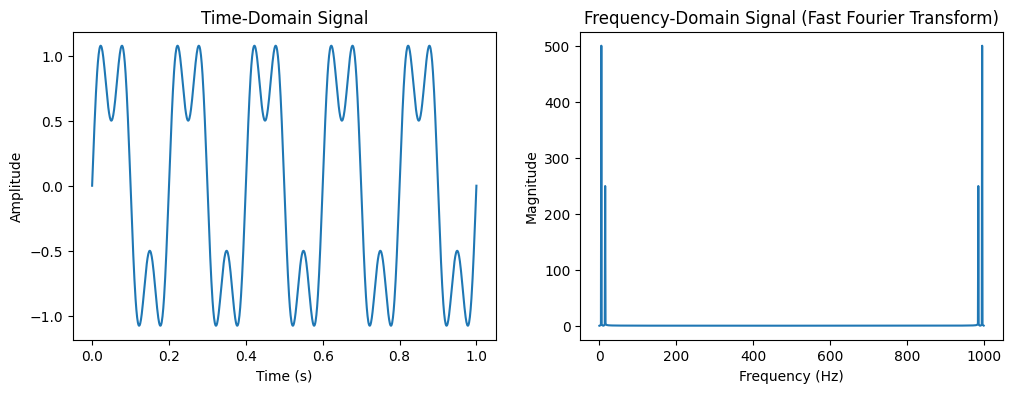

In [21]:
from scipy.fft import fft

# Compute the Fast Fourier Transform
X_fft = fft(signal)

# Plot the signal and its frequency components
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(t, signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Time-Domain Signal')

ax2.plot(np.linspace(0, 1000, len(X_fft)), np.abs(X_fft))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.set_title('Frequency-Domain Signal (Fast Fourier Transform)')
plt.show()


#Power Spectral Density (PSD)
The Power Spectral Density (PSD) is a function that describes how the power of a signal is distributed across different frequencies. It is useful for identifying dominant frequency components and characterizing the spectral content of signals.

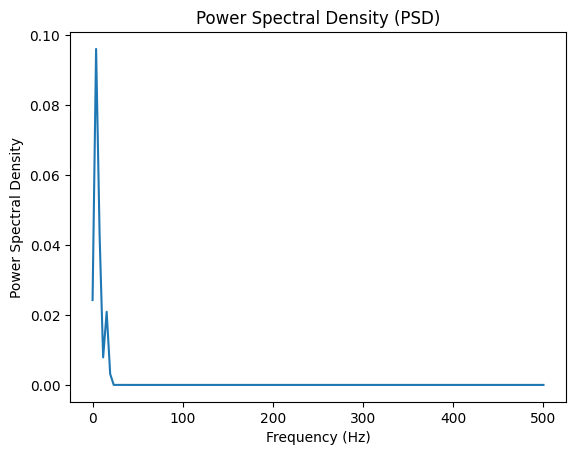

In [22]:
from scipy.signal import welch

# Compute the Power Spectral Density using Welch's method
f, Pxx = welch(signal, fs=1000, nperseg=256)

# Plot the Power Spectral Density
plt.plot(f, Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density (PSD)')

plt.show()


#Spectrogram

A spectrogram is a visual representation of the frequency content of a signal as it evolves over time. It is obtained by dividing the signal into short segments, computing the power spectral density for each segment, and then displaying the results as a two-dimensional plot with time on the x-axis, frequency on the y-axis, and power on the z-axis (usually represented as color intensity).


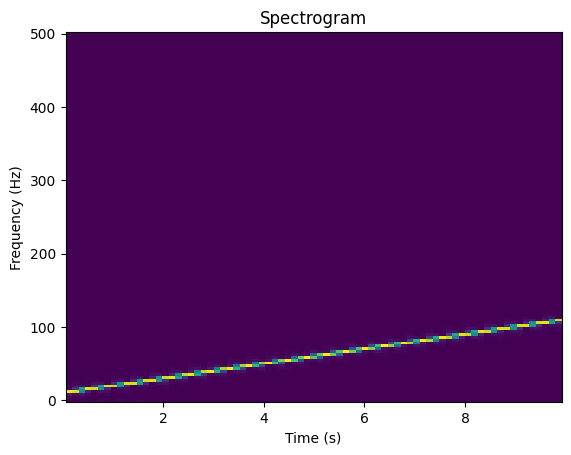

In [23]:
from scipy.signal import spectrogram

# Generate a synthetic signal with varying frequency components
t = np.linspace(0, 10, 10000)
signal = np.sin(2 * np.pi * (10 + 5 * t) * t)

# Compute the spectrogram
f, t_spec, Sxx = spectrogram(signal, fs=1000, nperseg=256, noverlap=128)

# Plot the spectrogram
plt.pcolormesh(t_spec, f, Sxx, shading='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.show()

# EEG data: Example of applying Fourier Transform, Fast Fourier Transform (FFT), Power Spectral Density (PSD), and Spectrogram to simulated EEG 8 channel data

<ipython-input-26-c3344f8fa05d>:48: ComplexWarning: Casting complex values to real discards the imaginary part
  X[channel] = np.fft.fft(eeg_data_filtered[channel])
<ipython-input-26-c3344f8fa05d>:54: ComplexWarning: Casting complex values to real discards the imaginary part
  X_fft[channel] = np.fft.fft(eeg_data_filtered[channel])


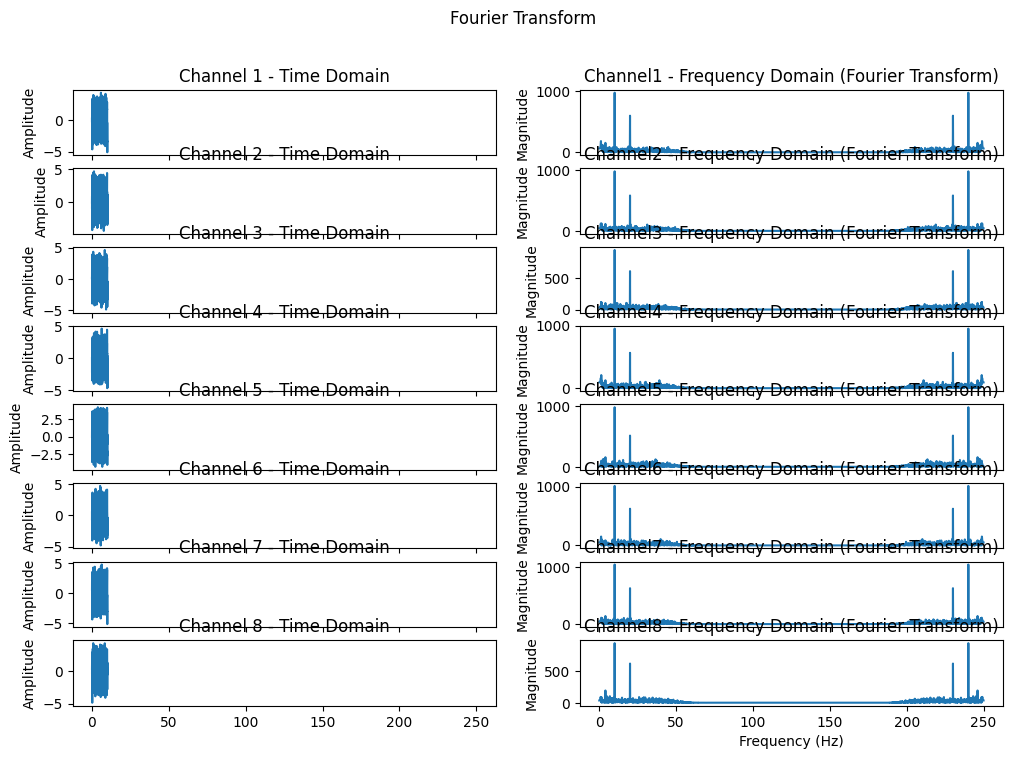

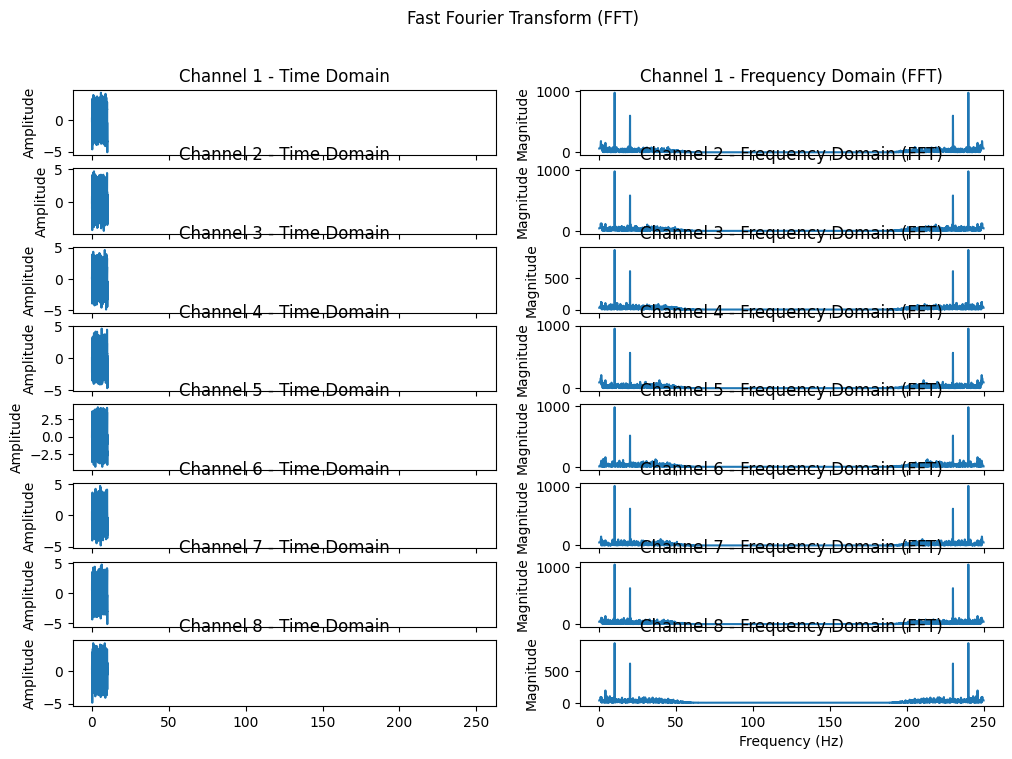

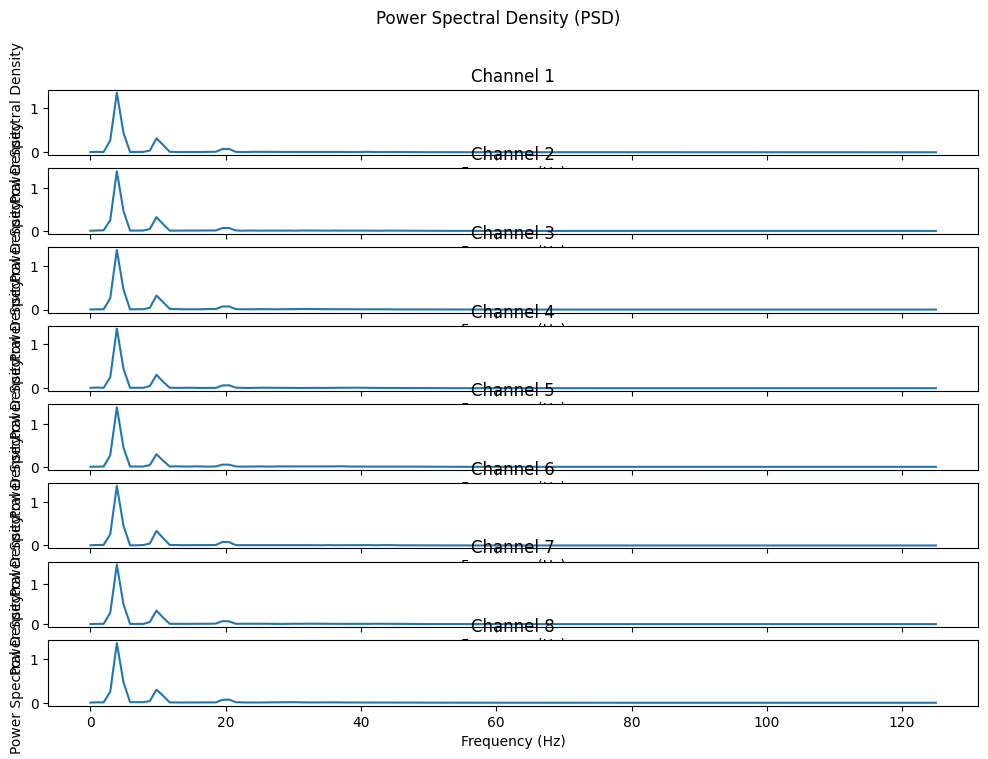

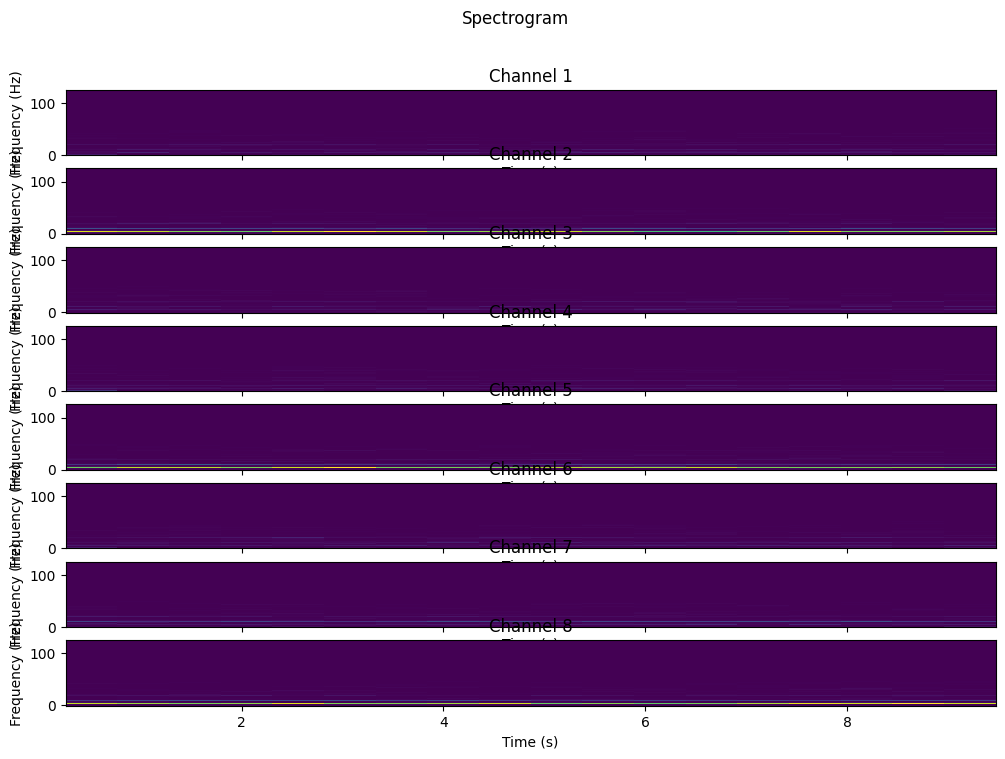

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch, spectrogram

# Function to create a Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Generate synthetic 8-channel EEG data
np.random.seed(42)
fs = 250  # sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # time vector
num_channels = 8

# Generate random EEG-like signals
eeg_data = np.random.normal(0, 1, (num_channels, len(t)))

# Add sinusoidal components to the EEG data to simulate brain rhythms
freqs = [4, 10, 20]  # frequencies in Hz
amplitudes = [2, 1, 0.5]  # amplitudes
phases = [0, np.pi / 4, np.pi / 2]  # phases

for channel in range(num_channels):
    for f, A, phi in zip(freqs, amplitudes, phases):
        eeg_data[channel] += A * np.sin(2 * np.pi * f * t + phi)

# Band-pass filter the EEG data to keep frequency components within the range of 1-50 Hz
lowcut, highcut = 1, 50
eeg_data_filtered = np.zeros_like(eeg_data)

for channel in range(num_channels):
    eeg_data_filtered[channel] = butter_bandpass_filter(eeg_data[channel], lowcut, highcut, fs)

# Frequency-domain analysis techniques
# Fourier Transform
X = np.zeros_like(eeg_data_filtered)

for channel in range(num_channels):
    X[channel] = np.fft.fft(eeg_data_filtered[channel])

# Fast Fourier Transform (FFT)
X_fft = np.zeros_like(eeg_data_filtered)

for channel in range(num_channels):
    X_fft[channel] = np.fft.fft(eeg_data_filtered[channel])

# Power Spectral Density (PSD)
f, Pxx = welch(eeg_data_filtered[0], fs=fs, nperseg=256)

# Spectrogram
f_spec, t_spec, Sxx = spectrogram(eeg_data_filtered[0], fs=fs, nperseg=256, noverlap=128)

# Plot the results
# Fourier Transform
fig, axs = plt.subplots(num_channels, 2, figsize=(12, 8), sharex=True)
for channel in range(num_channels):
    axs[channel, 0].plot(t, eeg_data_filtered[channel])
    axs[channel, 0].set_ylabel('Amplitude')
    axs[channel, 0].set_title(f'Channel {channel+1} - Time Domain')

    axs[channel, 1].plot(np.linspace(0, fs, len(X[channel])), np.abs(X[channel]))
    axs[channel, 1].set_ylabel('Magnitude')
    axs[channel, 1].set_title(f'Channel{channel+1} - Frequency Domain (Fourier Transform)')

fig.suptitle('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.show()

#Fast Fourier Transform (FFT)
fig, axs = plt.subplots(num_channels, 2, figsize=(12, 8), sharex=True)
for channel in range(num_channels):
  axs[channel, 0].plot(t, eeg_data_filtered[channel])
  axs[channel, 0].set_ylabel('Amplitude')
  axs[channel, 0].set_title(f'Channel {channel+1} - Time Domain')
  axs[channel, 1].plot(np.linspace(0, fs, len(X_fft[channel])), np.abs(X_fft[channel]))
  axs[channel, 1].set_ylabel('Magnitude')
  axs[channel, 1].set_title(f'Channel {channel+1} - Frequency Domain (FFT)')
fig.suptitle('Fast Fourier Transform (FFT)')
plt.xlabel('Frequency (Hz)')
plt.show()

#Power Spectral Density (PSD)
fig, axs = plt.subplots(num_channels, figsize=(12, 8), sharex=True)
for channel in range(num_channels):
  f, Pxx = welch(eeg_data_filtered[channel], fs=fs, nperseg=256)
  axs[channel].plot(f, Pxx)
  axs[channel].set_xlabel('Frequency (Hz)')
  axs[channel].set_ylabel('Power Spectral Density')
  axs[channel].set_title(f'Channel {channel+1}')

fig.suptitle('Power Spectral Density (PSD)')
plt.show()

#Spectrogram
fig, axs = plt.subplots(num_channels, figsize=(12, 8), sharex=True)
for channel in range(num_channels):
  f_spec, t_spec, Sxx = spectrogram(eeg_data_filtered[channel], fs=fs, nperseg=256, noverlap=128)
  axs[channel].pcolormesh(t_spec, f_spec, Sxx, shading='auto')
  axs[channel].set_xlabel('Time (s)')
  axs[channel].set_ylabel('Frequency (Hz)')
  axs[channel].set_title(f'Channel {channel+1}')

fig.suptitle('Spectrogram')
plt.show()

#Time-frequency analysis 
Time-frequency analysis techniques are essential for studying signals that vary in both time and frequency domains. In this section, we will discuss some common time-frequency analysis techniques, including Short-Time Fourier Transform (STFT), Continuous Wavelet Transform (CWT), and Discrete Wavelet Transform (DWT).

#Short-Time Fourier Transform (STFT)
The Short-Time Fourier Transform (STFT) is a time-frequency analysis technique that involves applying the Fourier Transform to small, overlapping segments of a signal. By applying the Fourier Transform to each segment, we can analyze the frequency content of the signal over time.

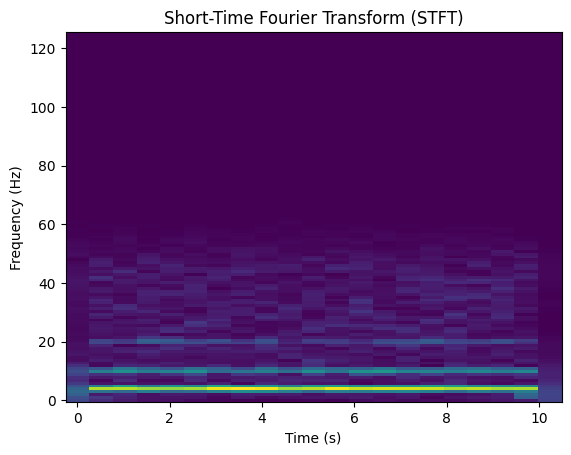

In [27]:
from scipy.signal import stft

# Compute the Short-Time Fourier Transform
f_stft, t_stft, Zxx = stft(eeg_data_filtered[0], fs=fs, nperseg=256, noverlap=128)

# Plot the Short-Time Fourier Transform
plt.pcolormesh(t_stft, f_stft, np.abs(Zxx), shading='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Short-Time Fourier Transform (STFT)')
plt.show()


#Continuous Wavelet Transform (CWT)
The Continuous Wavelet Transform (CWT) is a time-frequency analysis technique that involves convolving a signal with a wavelet function that varies in both time and frequency. The CWT provides a high resolution time-frequency analysis of a signal and is useful for analyzing non-stationary signals.

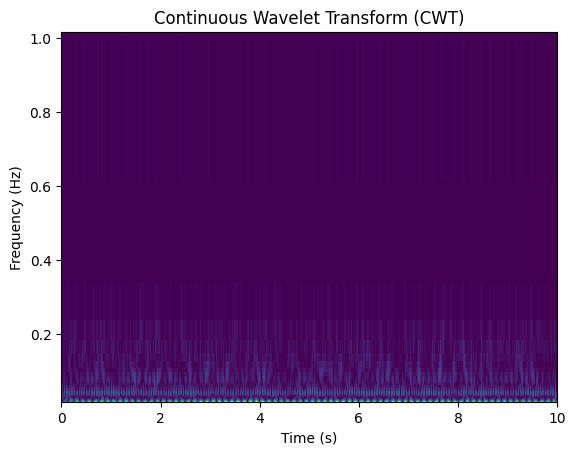

In [28]:
import pywt

# Compute the Continuous Wavelet Transform using the Morlet wavelet
wavelet = pywt.ContinuousWavelet('morl')
cwtmatr, freqs = pywt.cwt(eeg_data_filtered[0], np.arange(1, 50), wavelet=wavelet)

# Plot the Continuous Wavelet Transform
plt.pcolormesh(t, freqs, np.abs(cwtmatr), shading='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Continuous Wavelet Transform (CWT)')
plt.show()


#Discrete Wavelet Transform (DWT)
The Discrete Wavelet Transform (DWT) is a time-frequency analysis technique that involves decomposing a signal into different frequency sub-bands using a series of low-pass and high-pass filters. The DWT is useful for analyzing signals with varying frequency content and is often used for denoising and compression.

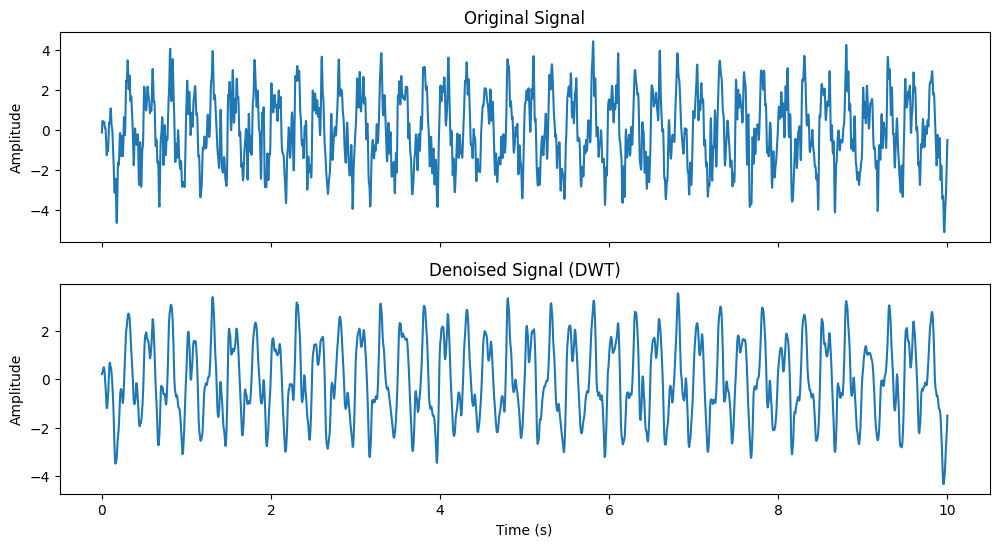

In [30]:
# Compute the Discrete Wavelet Transform using the db4 wavelet
coeffs = pywt.wavedec(eeg_data_filtered[0], 'db4')

# Reconstruct the signal using only the first 3 frequency sub-bands
reconstructed = pywt.waverec(coeffs[:-3] + [None] * 3, 'db4')

# Remove the last two samples from the reconstructed signal to match the length of the original signal
reconstructed = reconstructed[:-2]

# Plot the original signal and the reconstructed signal
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
axs[0].plot(t, eeg_data_filtered[0])
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Original Signal')

axs[1].plot(t, reconstructed)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Denoised Signal (DWT)')
plt.show()
